# FAI Lec 13-2 감성분석(Sentiment Analysis)과 주가예측

금융AI

# 자연어처리 NLP (Natural Language Processing)

자연어란 우리가 일상생활에서 사용하는 언어를 말하고 자연어의 의미를 분석해서 컴퓨터가 처리할 수 있도록 하는 것이 자연어처리이다.

### 자연어처리 예시
- 음성인식
- 내용 요약
- 번역
- 텍스트 분류작업 ex)스펨메일 분류
- 질의 응답 시스템
- 챗봇
- 감정분석(Sentiment Analysis)



# Sentiment Analysis

자연어처리중의 한 분야로 어떤 주제에 대해서 주관적인 생각, 감정, 태도등을 2진형식으로 분석한다. (긍정, 부정, 중립 등으로 3가지로 감정을 분류하기도 한다.)

예를 들어 영화를 보고 난 후 관람평을 기반으로 사람들이 영화에 대해서 좋은 평가를 내렸는지, 나쁜 평가를 내렸는지 분석한다. 혹은 어떤 토론주제에 대하여 글을 썼을때 찬성을 하는 글인지 반대를 하는 글인지 분석한다.

자연어처리를 언급하면 워드클라우드를 떠올릴 수도 있다. 텍스트에서 많이 반복되는 단어일수록 크게 표시하고 적게 반복되는 단어일수록 작게 표시하는 기술이며 이는 단어의 빈도를 중심으로 분석한다. 그러나 감정분석은 단어의 빈도 뿐만아니라 단어의 의미, 문장구조, 맥락까지 고려하여 텍스트를 분석한다.


감정분석은 데이터에서 사용자의 감정과 관련이 있는 텍스트를 가려내야한다. 사용자의 감정이 들어있지 않은 텍스트를 함께 분석하면 결과에 오차가 생길수도 있다. 감정이 들어있는 것을 subjectivity라고 한다. 예를 들어 "밥이 맛있다"는 사용자의 긍정적인 감정이지만 "밥을 먹었다"는 단순한 사실로 감정이 들어있지 않은, 즉 subjectivity가 없다. 객관적인 텍스트로 분석에서 제외시켜야 한다. 


subjectivity가 있는 텍스트에서 긍정/부정, 좋음/싫음 등으로 판단하는 작업을 마지막으로 수행한다. 이때 text의 감정이 어느 한쪽으로 치우쳐져있는 것을 편향성(Polarity)라고 한다.



###  vaderSentiment 
VADER (Valence Aware Dictionary 및 sEntiment Reasoner)는 소셜 미디어에 표현 된 감정에 특별히 맞춰진 어휘 및 규칙 기반 감정 분석 도구이며 다른 도메인의 텍스트에서 잘 작동한다.

vaderSentiment의 패키지는, 포지티브, 네거티브 및 중성 감정의 측정치를 제공

설치

* $ pip install vaderSentiment

### textblob
Simplified Text Processing

NLTK를 기반으로 하여 텍스트 처리를 수월하게 할 수 있도록 다양한 기능을 많이 포함 

  * NLTK(Natural Language Toolkit)는 언어 처리 기능을 제공하는 파이썬 라이브러리

TextBlob 객체를 생성시키면 주요 메쏘드를 통해서 텍스트 처리 작업이 단순해 진다.

설치

* $ pip install textblob

In [ ]:
# 설치가 필요한 경우 설치하세요. 
! pip install vaderSentiment
! pip install textblob

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

News data source: <https://www.kaggle.com/aaron7sun/stocknews>

`Combined_News_DJIA.csv` 파일을 다음 웹주소에서 다운 받아야 한다: <https://www.kaggle.com/aaron7sun/stocknews>

In [ ]:
# 다운받은 파일을 dataframe 형태로 저장;  

df0 = pd.read_csv('Combined_News_DJIA.csv') # read_csv() : csv형식의 파일을 읽는 함수 

In [ ]:
import math
import pandas_datareader as pdr 
from datetime import datetime

In [ ]:
# 주가 데이터를 불러오자 : DJIA   
# yahoo finance open API, 

start = datetime(2008,8,8) # Combined_News_DJIA.csv 파일에서 뉴스가 시작되는 날
end = datetime(2016,7,1)  # Combined_News_DJIA.csv 파일에서 뉴스 데이터가 끝나는 날

dji = pdr.DataReader('^DJI','yahoo',start,end) #DJIA 
snp = pdr.DataReader('^GSPC','yahoo',start,end) #S&P500 (참고로 다운받음) 
snp.head() # 상위 5개 데이터를 출력한다

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-08-07,1286.510010,1264.290039,1286.510010,1266.069946,5319380000,1266.069946
2008-08-08,1297.849976,1262.109985,1266.290039,1296.319946,4966810000,1296.319946
2008-08-11,1313.150024,1291.410034,1294.420044,1305.319946,5067310000,1305.319946
2008-08-12,1304.790039,1285.640015,1304.790039,1289.589966,4711290000,1289.589966
2008-08-13,1294.030029,1274.859985,1288.640015,1285.829956,4787600000,1285.829956


In [ ]:
df0.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [ ]:
df0.tail(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [ ]:
df0.index=pd.to_datetime(df0['Date']) # 'Date' 컬럼을 날짜데이터로 변경하고 df0데이터의 index로 지정
del df0['Date'] # 'Date' 컬럼을 삭제
df0.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'S

In [ ]:
# DJIA, S&P500 의 종가를 모아준다. 

df1 = pd.DataFrame({
    'dj': dji['Close'], 
    'sp': snp['Close']
}).dropna()

In [ ]:
# pd.merge() 함수는 두 dataframe을 각 데이터에 존재하는 고유값(key)을 기준으로 병합할 때 사용한다.
# df0와 df1의 dataframe을 인덱스를 기준으로 병합하되 
# left_index=True, 즉 왼쪽 dataframe의 인덱스를 join key로 사용한다.
# on='Date' 두 데이터의 'Date' 컬럼을 기준으로 'inner'(교집합) 조인한다.
#df2 = pd.merge(df0, df1, how='inner', on='Date', left_index=True)
df2 = pd.merge(df0, df1, how='inner', on='Date')

df2.tail()


,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,dj,sp
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,Weapons shipped into Jordan by the CIA and Sau...,...,Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,17140.240234,2000.540039
2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,UK's Osborne: 'Absolutely' going to have to cu...,...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,17409.720703,2036.089966
2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,Iceland historian Johannesson wins presidentia...,...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,17694.679688,2070.770020
2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,17929.990234,2098.860107
2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls pr

In [ ]:
# combine the top news headlines
headlines = []

for row in range(0, len(df2.index)): #0부터 df2의 인덱스의 길이만큼 row 변수값이 증가한다 row=0,1,2,.....len(df2.index)
  headlines.append(''.join( str(x) for x in df2.iloc[row, 1:26])) 
# df2 dataframe에서 row행, 1~25열 값들이 x이고
# 각 x를 문자열로 만든str(x) 후 모든 문자열들을 연결(join)해서 headlines 변수에 더한다(append)

In [ ]:
df2.iloc[1, 1:26]

Top1     b'Why wont America and Nato help us? If they w...
Top2           b'Bush puts foot down on Georgian conflict'
Top3     b"Jewish Georgian minister: Thanks to Israeli ...
Top4     b'Georgian army flees in disarray as Russians ...
Top5         b"Olympic opening ceremony fireworks 'faked'"
Top6     b'What were the Mossad with fraudulent New Zea...
Top7     b'Russia angered by Israeli military sale to G...
Top8     b'An American citizen living in S.Ossetia blam...
Top9     b'Welcome To World War IV! Now In High Definit...
Top10    b"Georgia's move, a mistake of monumental prop...
Top11    b'Russia presses deeper into Georgia; U.S. say...
Top12    b'Abhinav Bindra wins first ever Individual Ol...
Top13    b' U.S. ship heads for Arctic to define territ...
Top14    b'Drivers in a Jerusalem taxi station threaten...
Top15    b'The French Team is Stunned by Phelps and the...
Top16    b'Israel and the US behind the Georgian aggres...
Top17    b'"Do not believe TV, neither Russian nor Geor.

In [ ]:
# 출력해보아요. 
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"b\'BREAKING: Musharraf to be impeached.\'b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\'b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\'b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing"b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\'b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side"b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\'b\'Did the U.S. Prep Georgia for War with Russia?\'b\'Rice G

In [ ]:
# clean the data
clean_headlines=[]

for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]", '', headlines[i])) # remove b'  #headlines[i]의 값에서 b'를 삭제하고 clean_headlines 데이터에 추가(append)
  clean_headlines[i]= re.sub('b[(")]', '', clean_headlines[i]) # remove b" 
  clean_headlines[i]= re.sub("\'", '', clean_headlines[i]) # remove \' 



In [ ]:
# 정리된 데이터를 살펴보아요

clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war"BREAKING: Musharraf to be impeached.Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fireAfghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing"150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side"The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]Did the U.S. Prep Georgia for War with Russia?Rice Gives Green Light for Israel to Attack Iran: Says U.S. h

In [ ]:
# Add the clean headlines to the merge data set

df2['Combined_News'] = clean_headlines

# Show the new column 

df2['Combined_News'][0]

'Georgia downs two Russian warplanes as countries move to brink of war"BREAKING: Musharraf to be impeached.Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fireAfghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing"150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side"The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]Did the U.S. Prep Georgia for War with Russia?Rice Gives Green Light for Israel to Attack Iran: Says U.S. h

In [ ]:
df2.head(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,dj,sp,Combined_News
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11734.320312,1296.319946,Georgia downs two Russian warplanes as countri...
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11782.349609,1305.319946,Why wont America and Nato help us? If they won...


In [ ]:
# NLP(Natural Language Processing)는 자연어처리라고도 하며 인간의 언어를 컴퓨터로 해석할수있게 하는 기술
# NLP에서는 데이터를 전처리하는 과정이 중요한데 TextBlob으로 쉽게 할 수 있다.

# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
# Create two new columns 'Subjectivity' and 'polarity'

#df2 dataframe의 'Combined_News'컬럼의 모든 데이터에 getSubjectivity 함수를 적용(apply)한다.
df2['Subjectivity'] = df2['Combined_News'].apply(getSubjectivity) 
df2['Polarity'] = df2['Combined_News'].apply(getPolarity)

In [ ]:
df2.tail(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top21,Top22,Top23,Top24,Top25,dj,sp,Combined_News,Subjectivity,Polarity
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,17929.990234,2098.860107,Jamaica proposes marijuana dispensers for tour...,0.392035,-0.005811
2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,17949.369141,2102.949951,A 117-year-old woman in Mexico City finally re...,0.329966,-0.036532


In [ ]:
# Create a function to get the sentiment scores

def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
# Get the sentiment scores for each day
compound = []
neg = []
neu = []
pos = []
SIA = 0

for i in range(0, len(df2['Combined_News'])):
  SIA = getSIA(df2['Combined_News'][i]) #df2 dataframe의 'Combined_News'행, i 열의 데이터를 getSIA함수로 처리한 값을 SIA에 저장
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])
  

In [ ]:
# Store the sentiment scores in the merged data set df2

df2['Compound'] = compound 
df2['Negative'] = neg 
df2['Neutral'] = neu 
df2['Positive'] = pos 



In [ ]:
# 데이터 셋을 확인해 보아요

df2.head(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top25,dj,sp,Combined_News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,"b""No Help for Mexico's Kidnapping Surge""",11734.320312,1296.319946,Georgia downs two Russian warplanes as countri...,0.277104,-0.050303,-0.9971,0.215,0.733,0.052
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b""So this is what it's come to: trading sex fo...",11782.349609,1305.319946,Why wont America and Nato help us? If they won...,0.365960,0.082481,-0.9649,0.152,0.768,0.080


In [ ]:
keep_columns = ['dj', 'sp', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
df3 = df2[keep_columns] # df2 dataframe에서 keep_columns에 해당하는 데이터들을 추출해서 df3 dataframe에 저장
df3

,dj,sp,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
Date,,,,,,,,,
2008-08-08,11734.320312,1296.319946,0.277104,-0.050303,-0.9971,0.215,0.733,0.052,0
2008-08-11,11782.349609,1305.319946,0.365960,0.082481,-0.9649,0.152,0.768,0.080,1
2008-08-12,11642.469727,1289.589966,0.536257,-0.058650,-0.9658,0.130,0.811,0.059,0
2008-08-13,11532.959961,1285.829956,0.353922,-0.004739,-0.9805,0.143,0.800,0.057,0
2008-08-14,11615.929688,1292.930054,0.384127,0.026930,-0.9779,0.168,0.736,0.096,1
...,...,...,...,...,...,...,...,...,...
2016-06-27,17140.240234,2000.540039,0.341564,-0.030999,-0.9730,0.154,0.758,0.088,0
2016-06-28,17409.720703,2036.089966,0.348121,0.039423,-0.9524,0.133,0.764,0.103,1
2016-06-29,17694.679688,2070.770020,0.406462,0.046901,-0.9961,0.205,0.708,0.087,1


## 기초통계 

In [ ]:
S = df3[['Label','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]

df=S
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

             Label  Subjectivity     Polarity     Compound     Negative  \
count  1989.000000   1989.000000  1989.000000  1989.000000  1989.000000   
mean      0.535445      0.368171     0.024143    -0.944119     0.153100   
std       0.498867      0.063338     0.057847     0.232953     0.037416   
min       0.000000      0.160665    -0.254221    -0.999400     0.056000   
25%       0.000000      0.326315    -0.010933    -0.995500     0.126000   
50%       1.000000      0.366743     0.024263    -0.990900     0.151000   
75%       1.000000      0.408460     0.062020    -0.979400     0.178000   
max       1.000000      0.625000     0.222406     0.991900     0.292000   
var       0.248869      0.004012     0.003346     0.054267     0.001400   
skew     -0.142245      0.168361    -0.175727     6.664401     0.369313   
kurt     -1.981760      0.344875     0.793783    45.578162     0.119316   

           Neutral     Positive  
count  1989.000000  1989.000000  
mean      0.782974     0.063941

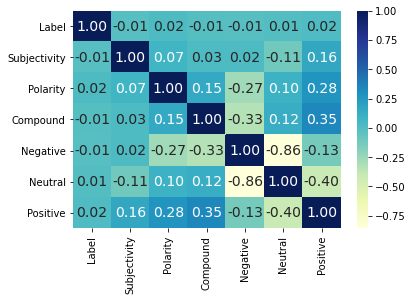

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(S.corr(), annot=True, cmap="YlGnBu",fmt=".2f",annot_kws={'size':14})
plt.show()

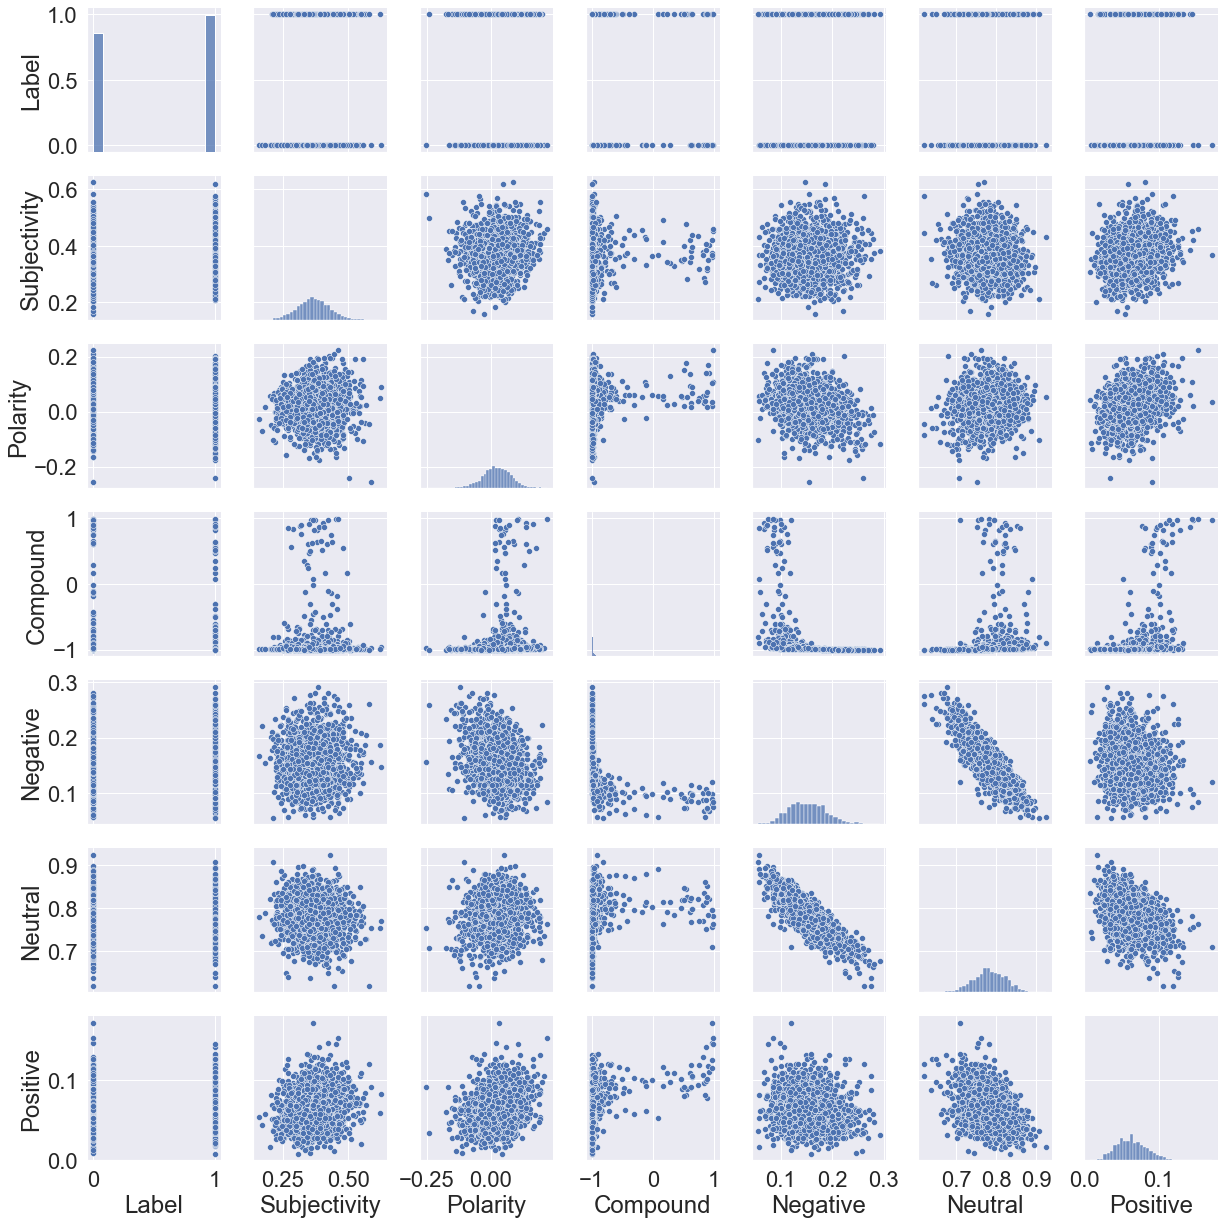

In [ ]:
sns.set(font_scale=2)
sns.pairplot(S)

### 기초통계 확인 결과 

Compound 값의 첨도(kurtosis)가 매우 큼: leptokurtic or fat-tail

Neutral과 Negative의 상관관계가 높은 편임 

하지만, 일단 모든 feature들을 사용하기로 함 (현재시점에서는 feature engineering이 없는 걸로 상정)

### Target과 feature 선정

In [ ]:
# 이제 feature data set을 만들어 보아요 
X = df3
X = np.array(df3[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']])

# target data set도 만들어 주어요
y = np.array(df3['Label'])

In [ ]:
# 데이터 셋을 다음과 같이 구분해 주어요:  80% of training data set, 20% of testing data set 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) 

# 머신러닝은 train데이터로 모델을 만든 후에
# 그 모델이 얼마나 정확한지 test 데이터로 점검을 한다.
# 그래서 주어진 데이터를 나누어서 일부는 training용, 일부는 test용으로 사용한다.

### 선형판별분석 (Linear discriminant analysis, LDA)
* linear decision surface를 사용하는 classifier
* 각 클래스의 평균, 분산 추정
* 데이터가 정규분포에 따르며, 모든 속성의 분산이 동일하고 각 변수의 값들이 평균 주변에 모여 있다고 가정
* LDA는 각 표본이 어느 클래스에 속하는지를 결정하기 위해 베이즈 정리를 이용하여 discriminant score 계산

In [ ]:
# 훈련(train) 데이터 셋으로 모형을 추정해 보아요
model = LinearDiscriminantAnalysis().fit(x_train, y_train)
# LinearDiscriminantAnalysis : 선형판별분석
# train 데이터로 모델을 학습시킨다 : fit함수

In [ ]:
# 모형을 prediction을 살펴보아요
predictions = model.predict(x_test)
predictions # 모델에 테스트 데이터를 적용했을때 결과값


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_test # 실제 값

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
# Show the model metrics
print(classification_report(y_test, predictions)) # 실제값과 모델로 예측한 값이 얼마나 일치하는지 분석을 한다.

# Precision과 Recall은 둘다 0~1의 값을 가지며 높을수록 좋음
# precision : 정밀도, 예측한 값은 true로 판별난것중에 실제값도 true인 것의 비율 , 1일경우 False Positive가 0건이라는 의미
# Recall : 재현율, 실제값이 true인 경우 중에 실제로 예측값도 true인것의 비율, 1일 경우 False Negative가 0건이라는 의미

# F1-score : Precision과 Recall의 조화평균
# Accuracy : 모델의 정확도
    
# macro avg : 모두 더한 다음 개수로 나눈 단순 평균
# weighted avg : 표본의 개수로 가중 평균

              precision    recall  f1-score   support

           0       0.36      0.03      0.05       193
           1       0.51      0.96      0.67       205

    accuracy                           0.51       398
   macro avg       0.43      0.49      0.36       398
weighted avg       0.44      0.51      0.37       398



# 다른 분류기와의 성과 비교

정확도 (𝑨𝒄𝒄𝒖𝒓𝒂𝒓𝒚)  =(𝑻𝑷+𝑻𝑵)/(𝑻𝑷+𝑻𝑵+𝑭𝑷+𝑭𝑵) = 1- error rate = 전체 중에서 모형을 바르게 분류한 비율

정밀도 (𝑷𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏)  =𝑻𝑷/(𝑻𝑷+𝑭𝑷) = 모형이 positive라고 분류한 것 중에서 실제로 positive인 비율

재현율 (Recall) = 𝑻𝑷/(𝑻𝑷+𝑭𝑵) =실제 데이터 값이 positive인 것 중 모형이 positive로 분류한 비율 

F1 Score =(𝟐×𝑷𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏 ×𝑹𝒆𝒄𝒂𝒍𝒍)/(𝑷𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏+𝑹𝒆𝒄𝒂𝒍𝒍) = Precision과 Recall의 조화평균 

In [ ]:
X_df = df3.drop(['Label','dj','sp'] ,1)
y_df = df3['Label']

df_result_list = pd.DataFrame(index=range(0), columns=['Model', 'Accuracy score', 'Precision score', 'Recall score', 'f1_score'])


start_date='2013' 
end_date='2016'

### 모형성과 출력 함수 정의

In [ ]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *


def model_evaluation(model, model_name, df):
    actual = np.array(model.df_result['Actual'], dtype=np.int)
    predicted = np.array(model.df_result['Predicted'], dtype=np.int)
    print(classification_report(actual, predicted))

    print('accuracy_score:', accuracy_score(actual, predicted))
    print('precision_score:', precision_score(actual, predicted))
    print('recall_score:', recall_score(actual, predicted))### Recall score
    print('f1_score:', f1_score(actual, predicted))### F1 Score

    matrix = confusion_matrix(actual, predicted)

    plt.subplots(figsize=(12,8))
    sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion matrix');

    new_data = {'Model' : model_name, 
                'Accuracy score' : accuracy_score(actual, predicted), 
                'Precision score' : precision_score(actual, predicted), 
                'Recall score' : recall_score(actual, predicted), 
                'f1_score' : f1_score(actual, predicted)
                }
    df = df.append(new_data, ignore_index=True)

    return df

## Logistic regression

In [ ]:
from sklearn.linear_model import LinearRegression

class LinearRegressionModel(object):
    def __init__(self):
        self.df_result = pd.DataFrame(columns=['Actual', 'Predicted'])

    def get_model(self):
        return LinearRegression(fit_intercept=False)

    def learn(self, df, ys, start_date, end_date, lookback_period=20):
        model = self.get_model()

        for date in df[start_date:end_date].index:
            # Fit the model
            x = self.get_prices_since(df, date, lookback_period)
            y = self.get_prices_since(ys, date, lookback_period)
            model.fit(x, y.ravel())

            # Predict the current period
            x_current = df.loc[date].values
            [y_pred] = model.predict([x_current])

            # Store predictions
            new_index = pd.to_datetime(date, format='%Y-%m-%d')
            y_actual = ys.loc[date]
            self.df_result.loc[new_index] = [y_actual, y_pred]

    def get_prices_since(self, df, date_since, lookback):
        index = df.index.get_loc(date_since)
        return df.iloc[index-lookback:index]

In [ ]:
from sklearn.linear_model import LogisticRegression
class LogisticRegressionModel(LinearRegressionModel):        
    def get_model(self):            
        return LogisticRegression(solver='lbfgs')

In [ ]:
logistic_reg_model = LogisticRegressionModel()
logistic_reg_model.learn(X_df, y_df, start_date, 
                         end_date, lookback_period=420)
logistic_reg_model.df_result.tail()

,Actual,Predicted
2016-06-27,0,1
2016-06-28,1,1
2016-06-29,1,1
2016-06-30,1,1
2016-07-01,1,1


              precision    recall  f1-score   support

           0       0.32      0.02      0.05       405
           1       0.54      0.96      0.69       477

    accuracy                           0.53       882
   macro avg       0.43      0.49      0.37       882
weighted avg       0.44      0.53      0.39       882

accuracy_score: 0.528344671201814
precision_score: 0.535840188014101
recall_score: 0.9559748427672956
f1_score: 0.6867469879518072


<ipython-input-37-ddc49233ae17>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-37-ddc49233ae17>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

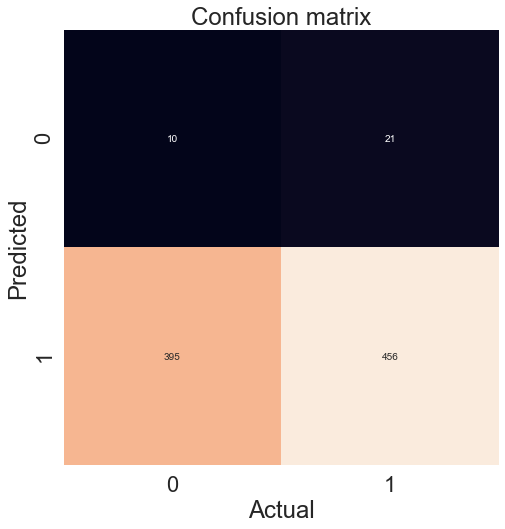

In [ ]:
df_result_list = model_evaluation(logistic_reg_model, "Logistic regression", df_result_list)

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

class SVCModel(LogisticRegressionModel):
    def get_model(self):
        return SVC(C=1000, gamma='auto')

In [ ]:
svc_model = SVCModel()
svc_model.learn(X_df, y_df, start_date, 
                         end_date, lookback_period=420)

              precision    recall  f1-score   support

           0       0.32      0.04      0.07       405
           1       0.53      0.93      0.68       477

    accuracy                           0.52       882
   macro avg       0.43      0.48      0.37       882
weighted avg       0.43      0.52      0.40       882

accuracy_score: 0.5204081632653061
precision_score: 0.5324519230769231
recall_score: 0.9287211740041929
f1_score: 0.6768525592055004


<ipython-input-37-ddc49233ae17>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-37-ddc49233ae17>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

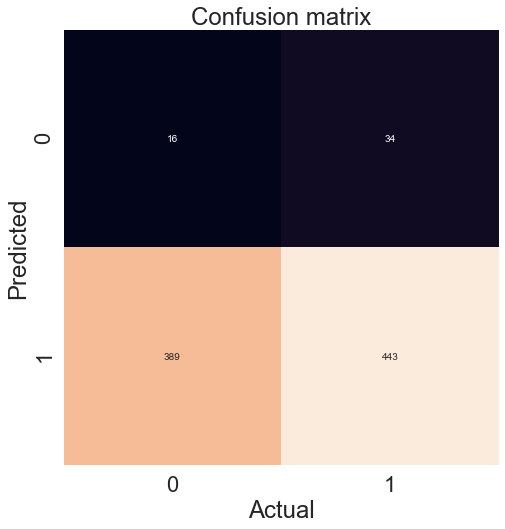

In [ ]:
df_result_list = model_evaluation(svc_model, "Support Vector Classifier", df_result_list)

## Stochastic Gradient Descent (SGD) 사용

In [ ]:
from sklearn.linear_model import SGDClassifier
 
class SGDModel(SVCModel):        
    def get_model(self):            
        return SGDClassifier( ) 

In [ ]:
sgd_model = SGDModel()    
sgd_model.learn(X_df, y_df, start_date, 
                         end_date, lookback_period=420) 

              precision    recall  f1-score   support

           0       0.50      0.46      0.48       405
           1       0.57      0.61      0.59       477

    accuracy                           0.54       882
   macro avg       0.54      0.53      0.53       882
weighted avg       0.54      0.54      0.54       882

accuracy_score: 0.5408163265306123
precision_score: 0.5708661417322834
recall_score: 0.6079664570230608
f1_score: 0.5888324873096447


<ipython-input-37-ddc49233ae17>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-37-ddc49233ae17>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

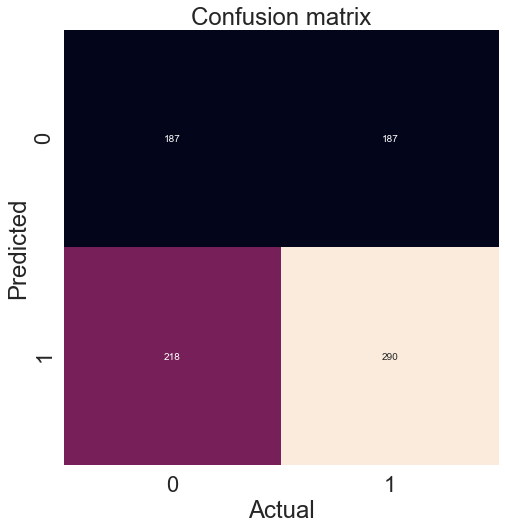

In [ ]:
df_result_list = model_evaluation(sgd_model, "Stochastic Gradient Descent", df_result_list)


## Linear discriminant analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 
class LDAModel(SVCModel):        
    def get_model(self):            
        return LinearDiscriminantAnalysis( ) 

In [ ]:
lda_model = LDAModel()    
lda_model.learn(X_df, y_df, start_date, 
                         end_date, lookback_period=420)

              precision    recall  f1-score   support

           0       0.46      0.20      0.28       405
           1       0.54      0.79      0.64       477

    accuracy                           0.52       882
   macro avg       0.50      0.50      0.46       882
weighted avg       0.50      0.52      0.48       882

accuracy_score: 0.5238095238095238
precision_score: 0.5406562054208274
recall_score: 0.7945492662473794
f1_score: 0.6434634974533106


<ipython-input-37-ddc49233ae17>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-37-ddc49233ae17>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

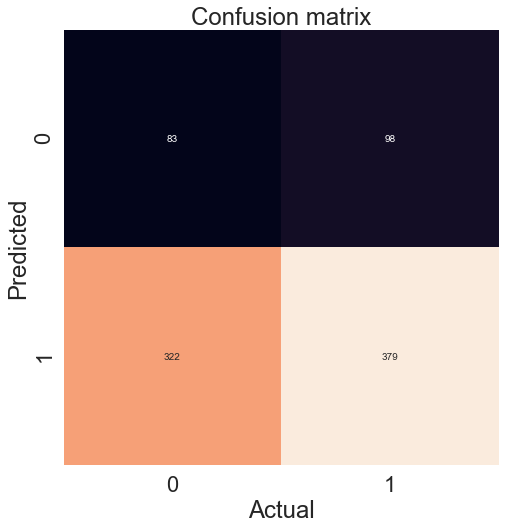

In [ ]:
df_result_list = model_evaluation(lda_model, "Linear discriminant analysis", df_result_list)

## Quadratic discriminant analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
class QDAModel(SVCModel):        
    def get_model(self):            
        return QuadraticDiscriminantAnalysis( ) 

In [ ]:
qda_model = QDAModel()    
qda_model.learn(X_df, y_df, start_date, 
                         end_date, lookback_period=420) 

              precision    recall  f1-score   support

           0       0.42      0.25      0.31       405
           1       0.53      0.70      0.60       477

    accuracy                           0.50       882
   macro avg       0.47      0.48      0.46       882
weighted avg       0.48      0.50      0.47       882

accuracy_score: 0.4965986394557823
precision_score: 0.5258215962441315
recall_score: 0.7044025157232704
f1_score: 0.6021505376344087


<ipython-input-37-ddc49233ae17>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-37-ddc49233ae17>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

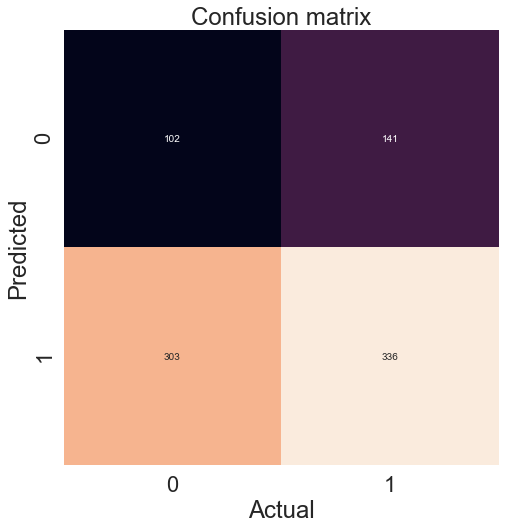

In [ ]:
df_result_list = model_evaluation(qda_model, "Quadratic discriminant analysis", df_result_list)

## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
class KNNModel(SVCModel):        
    def get_model(self):            
        return KNeighborsClassifier( ) 

In [ ]:
knn_model = KNNModel()    
knn_model.learn(X_df, y_df, start_date, 
                         end_date, lookback_period=420) 

              precision    recall  f1-score   support

           0       0.48      0.47      0.47       405
           1       0.56      0.57      0.56       477

    accuracy                           0.52       882
   macro avg       0.52      0.52      0.52       882
weighted avg       0.52      0.52      0.52       882

accuracy_score: 0.5204081632653061
precision_score: 0.5555555555555556
recall_score: 0.5660377358490566
f1_score: 0.5607476635514018


<ipython-input-37-ddc49233ae17>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-37-ddc49233ae17>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

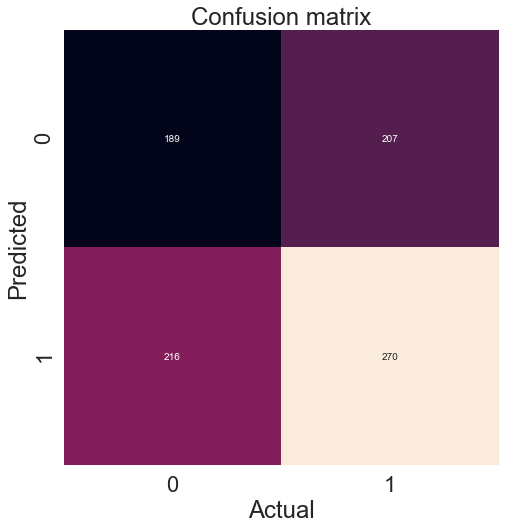

In [ ]:
df_result_list = model_evaluation(knn_model, "KNN classifier", df_result_list)

In [ ]:
df_result_list = df_result_list.set_index('Model')

In [ ]:
df_result_list['f1_score'].max()

0.6867469879518072

## 결과 각 결과 요소에 대한 그래프 출력

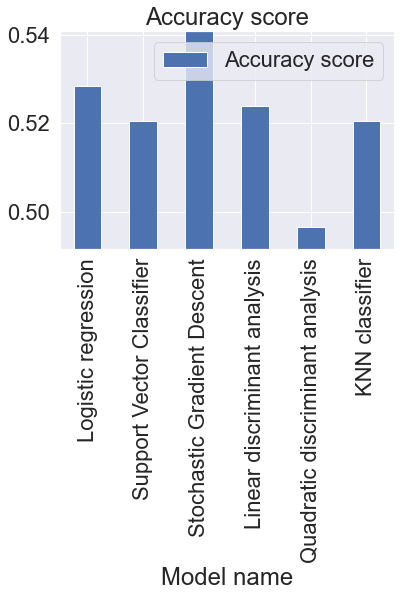

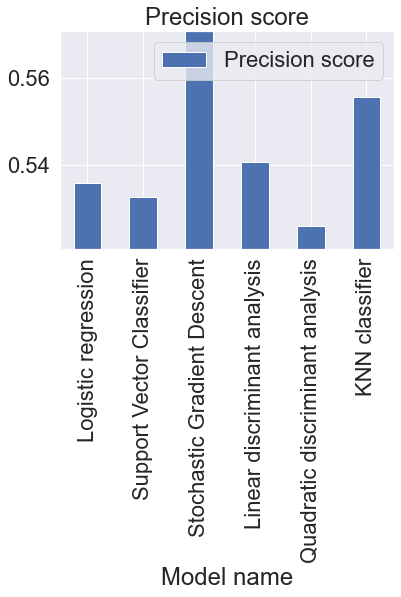

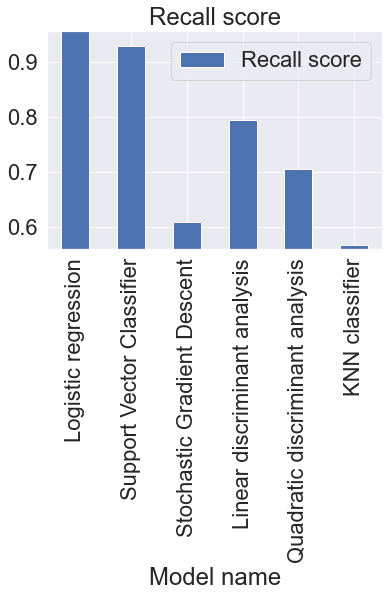

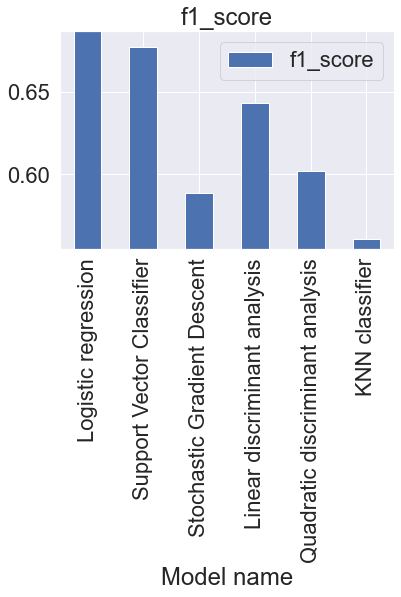

In [ ]:
for i in df_result_list.columns:
    df_result_list[i].plot(kind='bar')
    plt.ylim(df_result_list[i].min()*0.99, df_result_list[i].max())              # x축 최소최대값 
    plt.legend()
    plt.title(i)
    plt.xlabel("Model name")
    plt.ylabel("")
    plt.show()

In [ ]:
def get_model_performance(model, model_name, df):
    actual = np.array(model.df_result['Actual'], dtype=np.int)
    predicted = np.array(model.df_result['Predicted'], dtype=np.int)

    new_data = {'Model' : model_name, 
                'Accuracy score' : accuracy_score(actual, predicted), 
                'Precision score' : precision_score(actual, predicted), 
                'Recall score' : recall_score(actual, predicted), 
                'f1_score' : f1_score(actual, predicted)
                }
    df = df.append(new_data, ignore_index=True)

    return df

In [ ]:
def compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date):
    df_lda_result_per_lookback = pd.DataFrame(index=range(0), columns=['Model', 'Accuracy score', 'Precision score', 'Recall score', 'f1_score'])


#    for i in trange(101):
    for i in range(101):
        lookback_period = i*10 + 20
        name = str(i*10 + 10)
        model.learn(X_df, y_df, start_date, 
                                end_date, lookback_period)
        df_lda_result_per_lookback = get_model_performance(model, name, df_lda_result_per_lookback)

    df_lda_result_per_lookback = df_lda_result_per_lookback.set_index('Model')

    for i in df_lda_result_per_lookback:
        df_lda_result_per_lookback[i].plot()  
        plt.legend()
        plt.title(i)
        plt.xlabel("Lookback Period")
        plt.ylabel("")
        plt.show()

## Logistic Regression에서 lookback preriod 기간별 성과 비교

<ipython-input-60-aeffd75e2cbe>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-60-aeffd75e2cbe>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

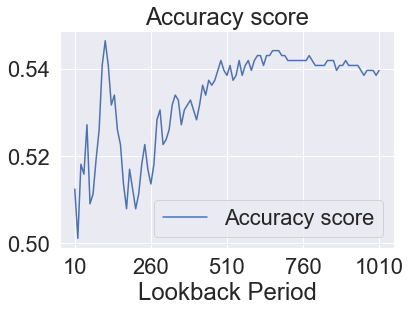

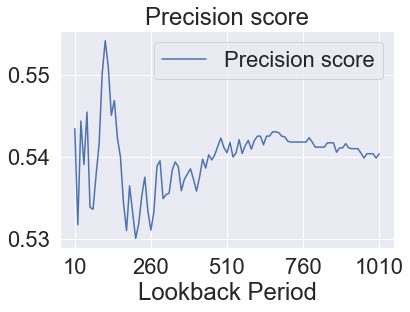

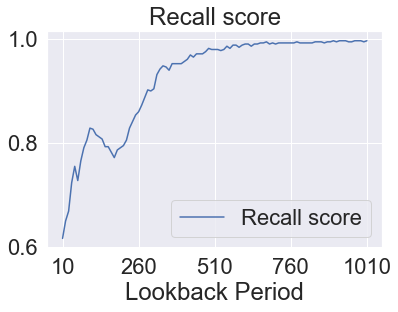

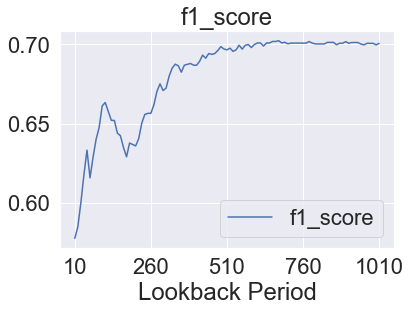

In [ ]:
model = LogisticRegressionModel() 
compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date)

## Support Vector Machine에서 lookback preriod 기간별 성과 비교

<ipython-input-60-aeffd75e2cbe>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-60-aeffd75e2cbe>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

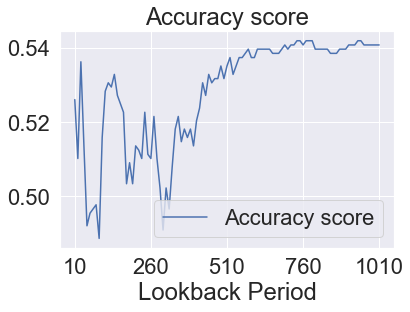

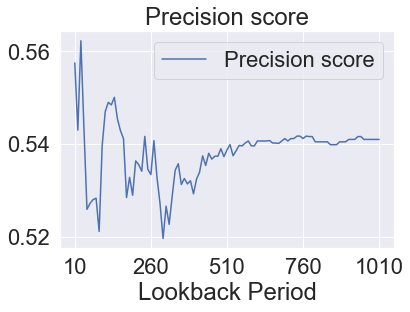

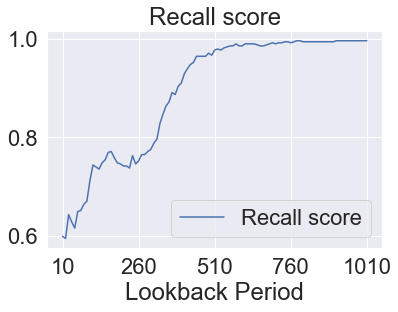

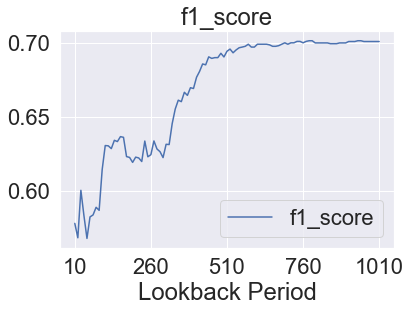

In [ ]:
model = SVCModel()
compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date)

## Stochastic Gradient Descent에서 lookback preriod 기간별 성과 비교

<ipython-input-60-aeffd75e2cbe>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-60-aeffd75e2cbe>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

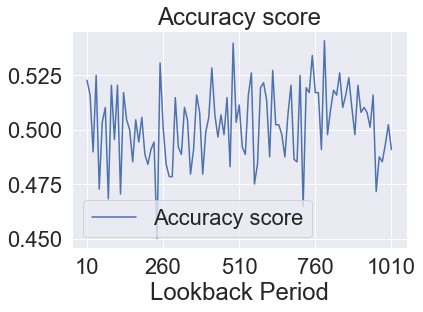

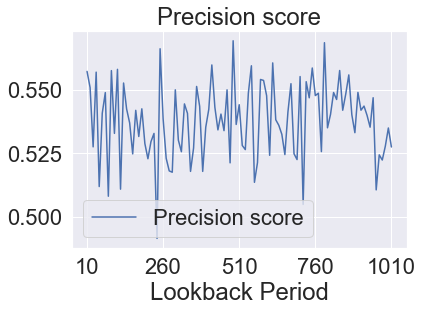

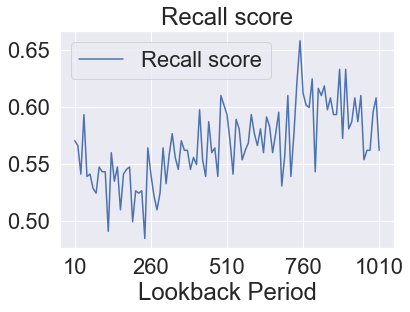

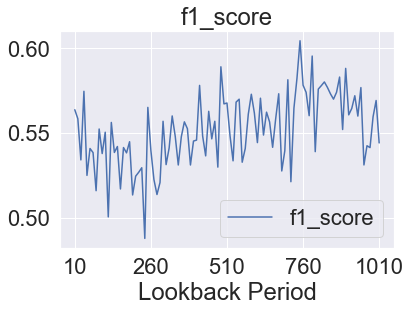

In [ ]:
model = SGDModel()  
compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date)

## Quadratic discriminant analysis에서 lookback preriod 기간별 성과 비교

C:\Users\CAU\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\CAU\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\CAU\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\CAU\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\CAU\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\CAU\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\CAU\anaconda3\lib\site-packages\sklea

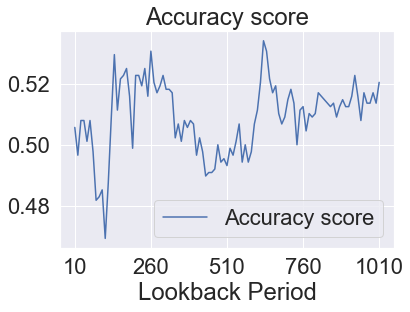

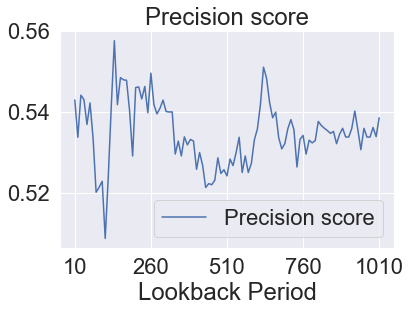

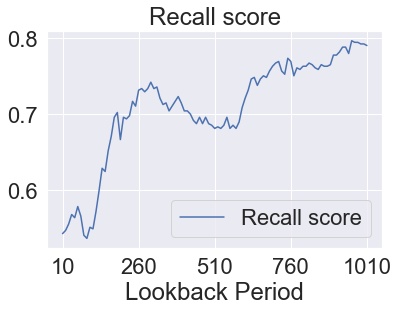

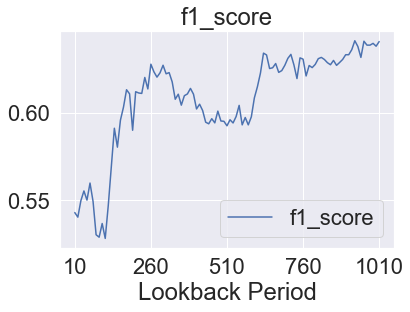

In [ ]:
model = QDAModel()
compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date)

## KNN Classifier에서 lookback preriod 기간별 성과 비교

<ipython-input-60-aeffd75e2cbe>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-60-aeffd75e2cbe>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

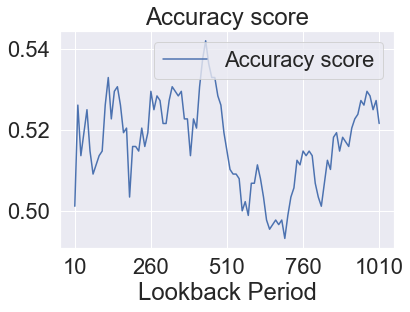

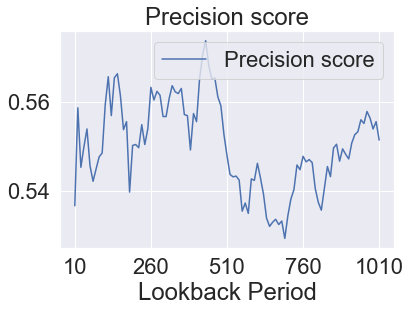

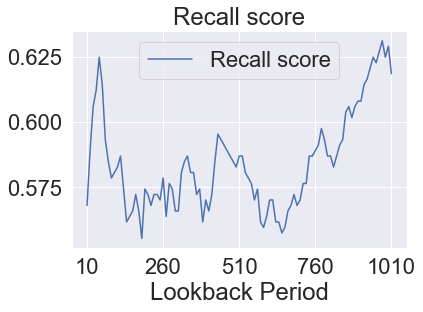

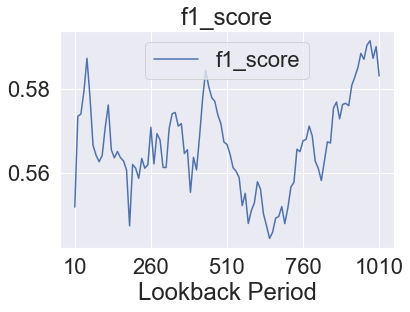

In [ ]:
model = KNNModel()   
compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date)

## Linear discriminant analysis 에서 lookback preriod 기간별 성과 비교

<ipython-input-60-aeffd75e2cbe>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype=np.int)
<ipython-input-60-aeffd75e2cbe>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

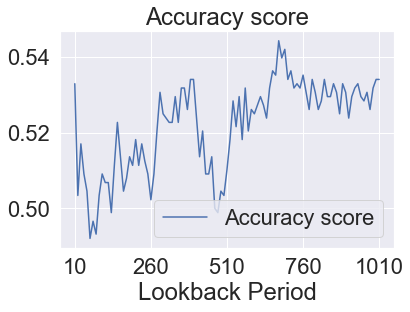

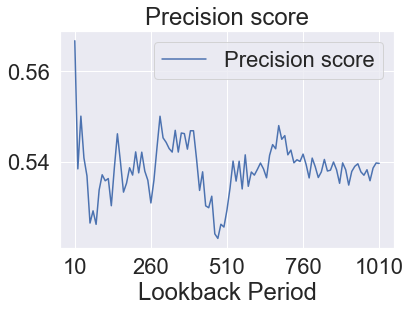

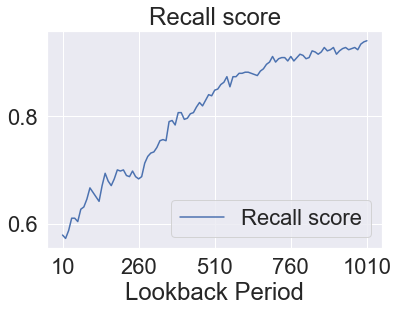

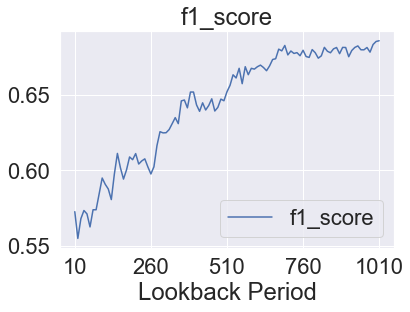

In [ ]:
model = LDAModel()  
compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date)
